# First steps

In [1]:
from retentioneering import init_config
import pandas as pd

Firstly, we need to initialize our config file

In [2]:
init_config(
    experiments_folder='experiments', # folder for saving experiment results: graph visualization, heatmaps and etc.
    index_col='user_pseudo_id', # column by which we split users / sessions / whatever
    event_col='event_name', # column that describes event
    event_time_col='event_timestamp', # column that describes timestamp of event
    positive_target_event='lost', # name of positive target event
    negative_target_event='passed', # name of negative target event
    pos_target_definition={ # how to define positive event, e.g. empty means that add passed for whom was not 'lost'
        'time_limit': 600
    },
    neg_target_definition={ # how to define negative event, e.g. users who were inactive for 600 seconds.

    },
#     neg_target_definition={ # you also can define target event as list of other events
#         'event_list': ['lost']
#     }
)

We need to create instance of pandas DataFrame with our data.

In [3]:
data = pd.read_csv('data/train.csv')
data = data.sort_values('event_timestamp')

In [4]:
data = data.retention.prepare()

In [5]:
data.head()

,event_name,event_timestamp,user_pseudo_id
13779,onboarding_welcome_screen,2018-09-30 21:00:04.985002,3f711081df2e582efe4be33349b811ae
13780,onboarding__chooseLoginType,2018-09-30 21:00:08.435003,3f711081df2e582efe4be33349b811ae
13781,onboarding_privacy_policyShown,2018-09-30 21:00:08.468004,3f711081df2e582efe4be33349b811ae
13782,onboarding_login_Type1,2018-09-30 21:00:08.478005,3f711081df2e582efe4be33349b811ae
13783,onboarding_privacy_policyAccepted,2018-09-30 21:00:11.123008,3f711081df2e582efe4be33349b811ae


In [6]:
edgelist = data.retention.get_edgelist()
edgelist.head()

,event_name,next_event,event_count
0,onboarding__chooseLoginType,lost,0.000242
1,onboarding__chooseLoginType,onboarding_login_Type1,0.100024
2,onboarding__chooseLoginType,onboarding_login_Type2,0.038415
3,onboarding__chooseLoginType,onboarding_privacy_policyShown,0.515342
4,onboarding__loginFailure,lost,0.000242


You can use any columns as edge source and target using `cols` param, by default it is equal to list of `event_col` and automatically created `next_event` (shift of it) is used.

Also you can use any column and any aggregation e.g.
one can calculate number of unique users, who passed through edge via next chunk

In [7]:
data.head()

,event_name,event_timestamp,user_pseudo_id,next_event,next_timestamp
30255,onboarding_welcome_screen,2018-09-30 21:06:50.616002,000bf8e1812a0335c7e65d52b3f6e816,onboarding_otherLogin__show,2018-09-30 21:06:56.091017
30256,onboarding_otherLogin__show,2018-09-30 21:06:56.091017,000bf8e1812a0335c7e65d52b3f6e816,onboarding_welcome_screen,2018-09-30 21:07:00.614024
30257,onboarding_welcome_screen,2018-09-30 21:07:00.614024,000bf8e1812a0335c7e65d52b3f6e816,onboarding_welcome_screen,2018-09-30 21:07:06.961003
30258,onboarding_welcome_screen,2018-09-30 21:07:06.961003,000bf8e1812a0335c7e65d52b3f6e816,onboarding_welcome_screen,2018-09-30 21:07:08.689012
30259,onboarding_welcome_screen,2018-09-30 21:07:08.689012,000bf8e1812a0335c7e65d52b3f6e816,onboarding_welcome_screen,2018-09-30 21:07:12.262026


In [8]:
edgelist = data.retention.get_edgelist(edge_col='user_pseudo_id', edge_attributes='users_nunique', norm=False)
edgelist.sort_values('users_nunique', ascending=False).head()

,event_name,next_event,users_nunique
84,onboarding_welcome_screen,onboarding_welcome_screen,2586
85,onboarding_welcome_screen,passed,2330
3,onboarding__chooseLoginType,onboarding_privacy_policyShown,2112
79,onboarding_welcome_screen,onboarding__chooseLoginType,1898
67,onboarding_privacy_policyShown,onboarding_login_Type1,1667


or adjacency matrix

In [9]:
data.retention.get_adjacency()

,onboarding__chooseLoginType,lost,onboarding_login_Type1,onboarding_login_Type2,onboarding_privacy_policyShown,onboarding__loginFailure,onboarding_login_Type1_cancel,onboarding_welcome_screen,onboarding_otherLogin__show,onboarding_privacy_policyAccepted,onboarding_privacy_policyDecline,onboarding_privacy_policyTapToPolicy,onboarding_otherLogin__chooseLoginType,passed,onboarding_otherLogin_privacy_policyDecline,onboarding_otherLogin_privacy_policyShown,onboarding_profile_edit_close,onboarding_otherLogin__close
onboarding__chooseLoginType,0.00,0.00,0.1,0.04,0.52,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
lost,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
onboarding_login_Type1,0.00,0.01,0.0,0.00,0.00,0.03,0.00,0.04,0.00,0.4,0.01,0.0,0.00,0.00,0.00,0.00,0.00,0.00
onboarding_login_Type2,0.01,0.01,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.1,0.01,0.0,0.00,0.01,0.00,0.00,0.00,0.00
onboarding_privacy_policyShown,0.00,0.00,0.4,0.11,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
onboarding__loginFailure,0.00,0.00,0.0,0.00,0.00,0.00,0.12,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
onboarding_login_Type1_cancel,0.05,0.02,0.0,0.00,0.00,0.00,0.00,0.00,0.04,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
onboarding_welcome_screen,0.47,0.25,0.0,0.00,0.00,0.00,0.00,1.21,0.39,0.0,0.00,0.0,0.00,0.56,0.00,0.00,0.00,0.00
onboarding_otherLogin__show,0.00,0.02,0.0,0.00,0.00,0.00,0.00,0.21,0.00,0.0,0.00,0.0,0.17,0.00,0.00,0.00,0.00,0.12
onboarding_privacy_policyAccepted,0.03,0.04,0.0,0.00,0.00,0.10,0.00,0.29,0.02,0.0,0.00,0.0,0.00,0.03,0.00,0.00,0.00,0.00


All similar parameters work for adjacency matrix calculation.

In [10]:
data.retention.get_adjacency(edge_col='user_pseudo_id', edge_attributes='users_nunique', norm=False)

,onboarding__chooseLoginType,lost,onboarding_login_Type1,onboarding_login_Type2,onboarding_privacy_policyShown,onboarding__loginFailure,onboarding_login_Type1_cancel,onboarding_welcome_screen,onboarding_otherLogin__show,onboarding_privacy_policyAccepted,onboarding_privacy_policyDecline,onboarding_privacy_policyTapToPolicy,onboarding_otherLogin__chooseLoginType,passed,onboarding_otherLogin_privacy_policyDecline,onboarding_otherLogin_privacy_policyShown,onboarding_profile_edit_close,onboarding_otherLogin__close
onboarding__chooseLoginType,0.0,1.0,356.0,142.0,2112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
onboarding_login_Type1,12.0,40.0,0.0,0.0,0.0,104.0,0.0,180.0,10.0,1639.0,43.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
onboarding_login_Type2,34.0,32.0,0.0,0.0,0.0,5.0,0.0,4.0,44.0,405.0,54.0,5.0,0.0,22.0,0.0,0.0,0.0,0.0
onboarding_privacy_policyShown,0.0,0.0,1667.0,455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
onboarding__loginFailure,0.0,1.0,0.0,0.0,0.0,0.0,457.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
onboarding_login_Type1_cancel,200.0,91.0,0.0,0.0,0.0,0.0,0.0,14.0,181.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
onboarding_welcome_screen,1898.0,1043.0,0.0,0.0,0.0,4.0,0.0,2586.0,1581.0,0.0,0.0,0.0,0.0,2330.0,0.0,0.0,16.0,3.0
onboarding_otherLogin__show,0.0,82.0,0.0,0.0,0.0,1.0,0.0,873.0,2.0,0.0,0.0,0.0,644.0,2.0,0.0,0.0,0.0,445.0
onboarding_privacy_policyAccepted,127.0,161.0,0.0,0.0,0.0,402.0,0.0,1187.0,81.0,0.0,0.0,0.0,0.0,121.0,0.0,0.0,0.0,0.0


or we can simply visualize graph.

By default weight in visualization is equal to rate of unique users, who pass the edge,
you can change it to rate of all event occasions by turning `user_based` equal `False`.

In [11]:
data.retention.plot_graph(thresh=0.05, width=800, height=800)

'experiments/index_2020-01-29 15_45_49_081046.html'

If you change node positions and want to save resulting layout, you can click on donwload button and load it to graph visualizer as follows.

In [12]:
data.retention.plot_graph(layout_dump='node_params.json', width=800, height=800)

'experiments/index_2020-01-29 15_45_59_088040.html'

Also you can use other data columns and aggregation functions from `retention.get_edgelist()` method (be sure that in this case `user_based=False`).

For example, we can visualize mean time between events.

Firtly, we should add column with time difference between event timestamps.

In [13]:
data['seconds_between_events'] = (data.next_timestamp - data.event_timestamp).dt.total_seconds()
# use show_percent=False to visualize absolute value
data.retention.plot_graph(user_based=False, edge_col='seconds_between_events', edge_attributes='time_mean', thresh=0.01, width=800, height=800, show_percent=False)

'experiments/index_2020-01-29 15_46_00_839700.html'

# Temporal funnel

Let's plot the temporal funnel. Rows correspond to different events and columns correspond to step number in the user trajectory, value corresponds to fraction of all users who had corresponding event at corresponding step. For example, you can see that all users in the analysis start from "welcome_screen" (step 1) and end ended up passed (~0.6) or lost (~0.4) after 24 steps

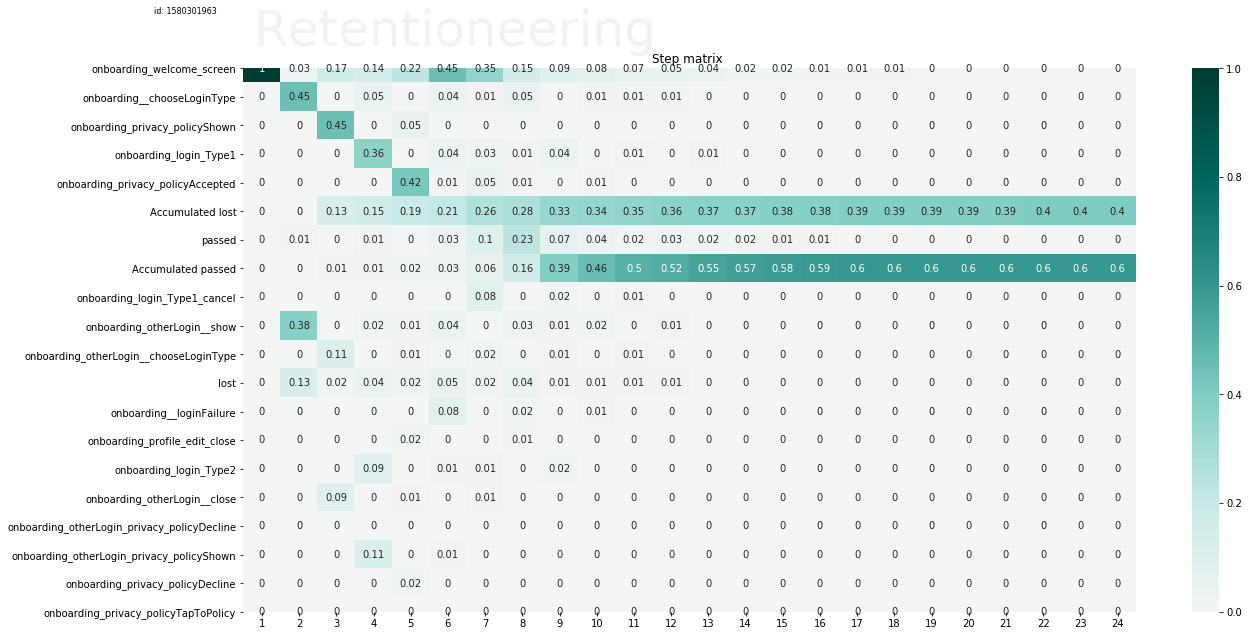

In [14]:
desc_table = data.retention.get_step_matrix(max_steps=30)

And we can calculate temporal funnel difference between two groups

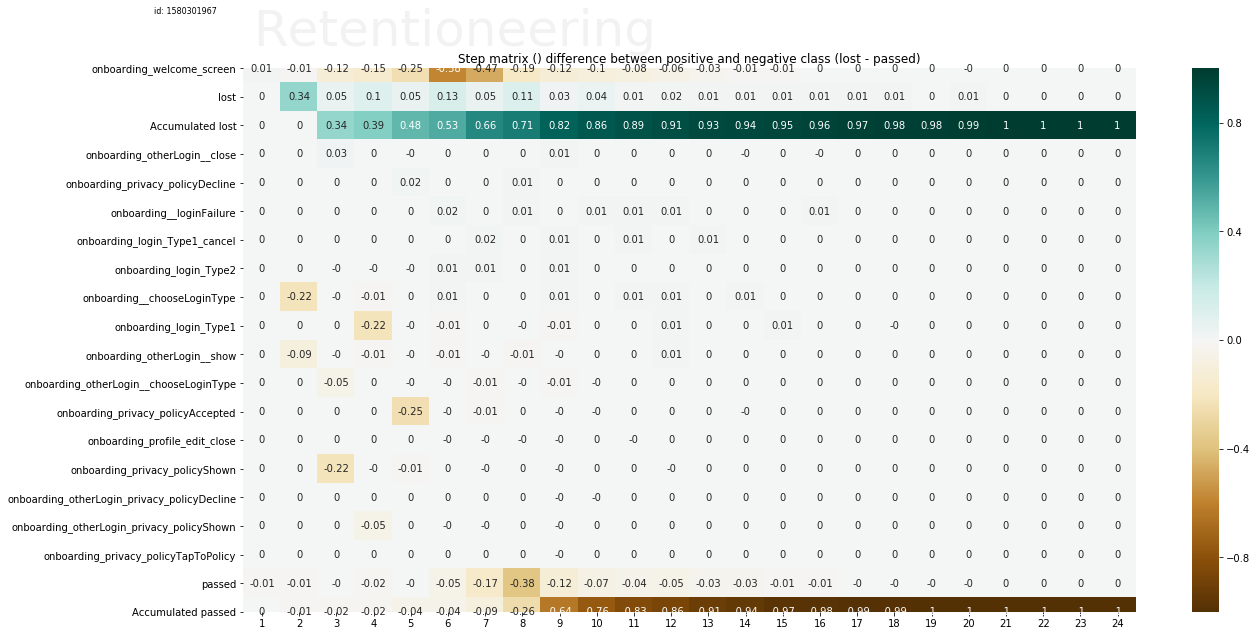

In [15]:
# create group filter based on target events
diff_filter = data.retention.create_filter()

# calculate difference table between two groups
diff_table = data.retention.get_step_matrix_difference(diff_filter, max_steps=30)

# Clustering

We can use clustering with different visualizations

Clutermap allows to see how important different events are for clustering.
For example we can see that `onboarding_welcome_screen` is always equal, so it does not affect clustering, but `onboarding_chooseLoginType` varies accross users and creates some clusters.

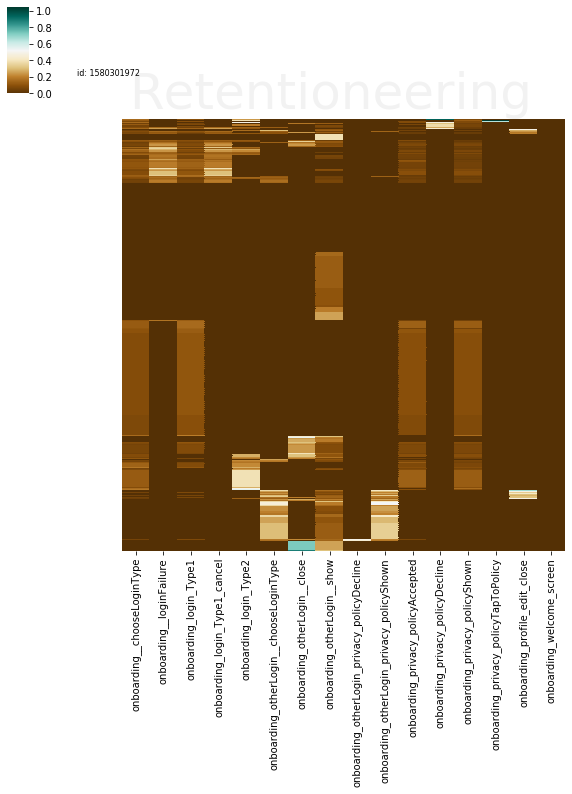

In [16]:
data.retention.get_clusters(plot_type='cluster_heatmap');

Then it will be useful to visualize projection of user trajectories to understand how many clusters we have.

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



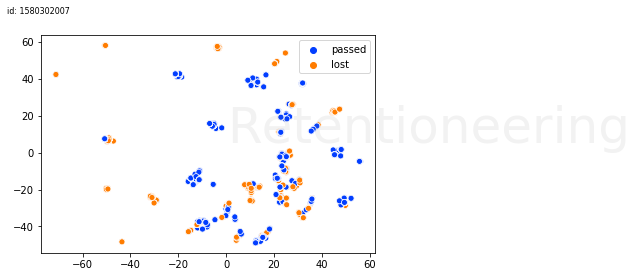

In [17]:
data.retention.learn_tsne(plot_type='targets');

We can see that projection is poor, so it will be good to tune it. To update TSNE weights we need to set `refit` parameter to `True`.

Any parameter from `sklearn.manifold.TSNE` can be used, e.g. `perplexity` can help to obtain better visualization.

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



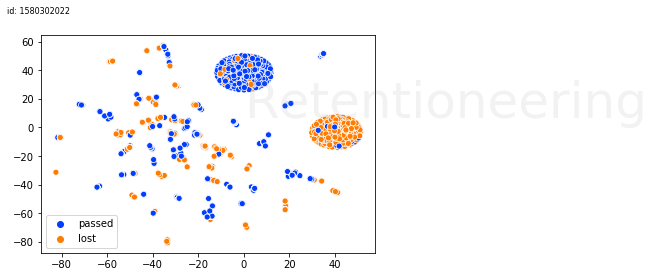

In [18]:
data.retention.learn_tsne(perplexity=10, plot_type='targets', refit=True);

Now we can see two dense cirle clusters.

Any parameters from `sklearn.cluster.KMeans` can be used.

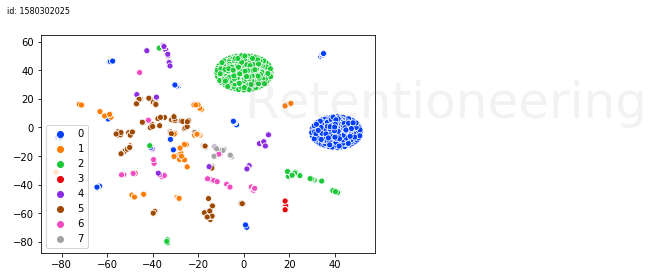

In [19]:
data.retention.get_clusters(n_clusters=8, plot_type='cluster_tsne', refit_cluster=True);

We do not use target events in clustering, so we can compare different groups in terms of what target event is likely to occur in them.

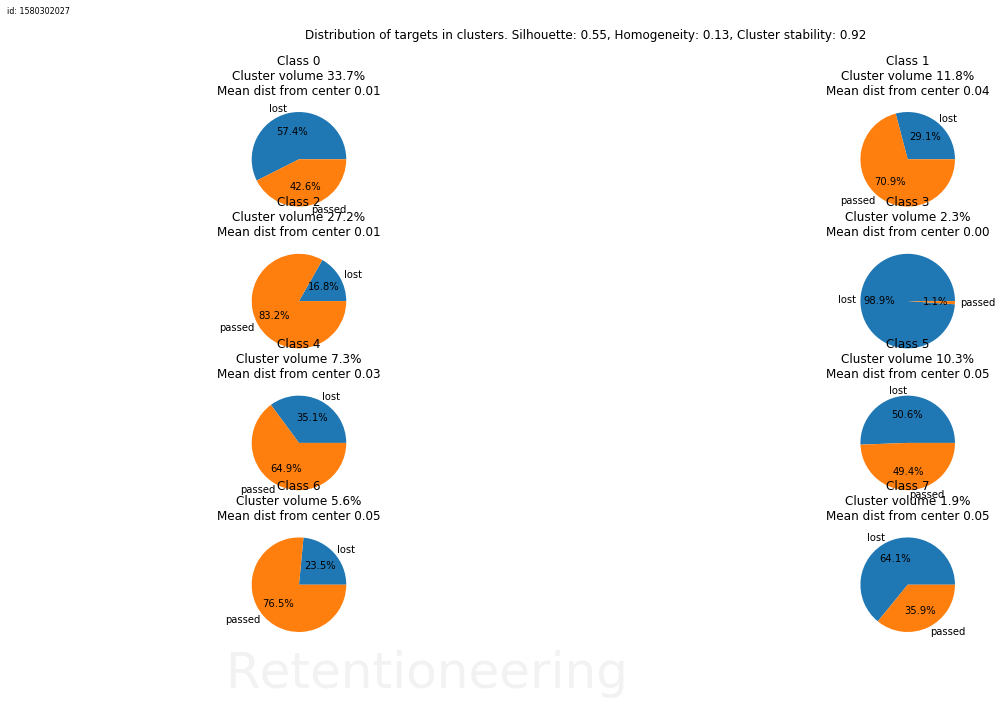

In [20]:
data.retention.get_clusters(plot_type='cluster_pie');

We can see that clusters `0` and `1` are pretty interesting, so we can visualize graph for them.

In [21]:
(data
 .retention
 .filter_cluster(0)
 .retention
 .plot_graph(width=800, height=800))

/Users/anatolyzaytsev/Library/Python/3.7/lib/python/site-packages/networkx-2.4rc1-py3.7.egg/networkx/drawing/layout.py:950: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



'experiments/index_2020-01-29 15_47_08_384686.html'

In [22]:
(data
 .retention
 .filter_cluster(1)
 .retention
 .plot_graph(width=800, height=800))

'experiments/index_2020-01-29 15_47_08_462063.html'

# Supervised classifier

Supervised learning is usually better then clustering.

In [23]:
model = data.retention.create_model()

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



To understand what features are meaningful, we can visualize graph of weights.

Larger the node or edge, larger its effect on probability of target event.
Green nodes mean positive effect, red nodes -- negative.

In [24]:
features = data.retention.extract_features(ngram_range=(1,2))
target = features.index.isin(data.retention.get_positive_users())


                ROC-AUC: 0.9124599766618595
                PR-AUC: 0.8975122645623361
                Accuracy: 0.8849514563106796
                


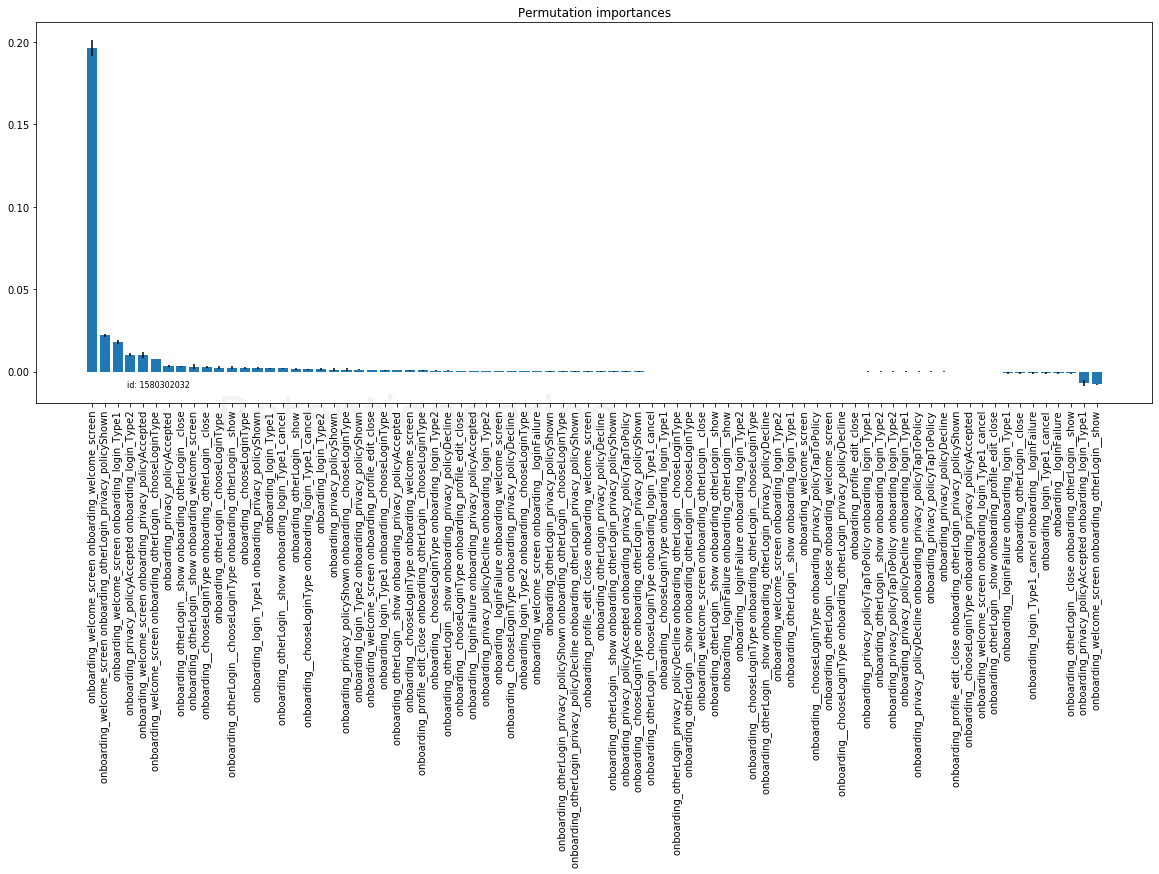

,importances_mean,importances_std,feature
4,0.196650,0.004843,"(onboarding_welcome_screen, onboarding_welcome..."
9,0.021893,0.001143,"(onboarding_welcome_screen, onboarding_otherLo..."
36,0.017718,0.001149,"(onboarding_welcome_screen, onboarding_login_T..."
27,0.010291,0.000941,"(onboarding_privacy_policyAccepted, onboarding..."
28,0.010049,0.001833,"(onboarding_welcome_screen, onboarding_privacy..."
...,...,...,...
15,-0.000874,0.000625,"(onboarding_login_Type1_cancel,)"
14,-0.000922,0.000676,"(onboarding__loginFailure,)"
31,-0.001019,0.000322,"(onboarding_otherLogin__close, onboarding_othe..."
20,-0.006990,0.001583,"(onboarding_privacy_policyAccepted, onboarding..."


In [25]:
model.permutation_importance(features, target, thresh=0.)

You can use any different model with sklearn-api (ont only sklearn package has it e.g. `lightgm` can be used too).

And pass params to it.

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = data.retention.create_model(RandomForestClassifier, n_estimators=25)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



In [27]:
features = data.retention.extract_features(ngram_range=(1,2))
target = features.index.isin(data.retention.get_positive_users())


                ROC-AUC: 0.9588970025137163
                PR-AUC: 0.9454387539234955
                Accuracy: 0.9269417475728156
                


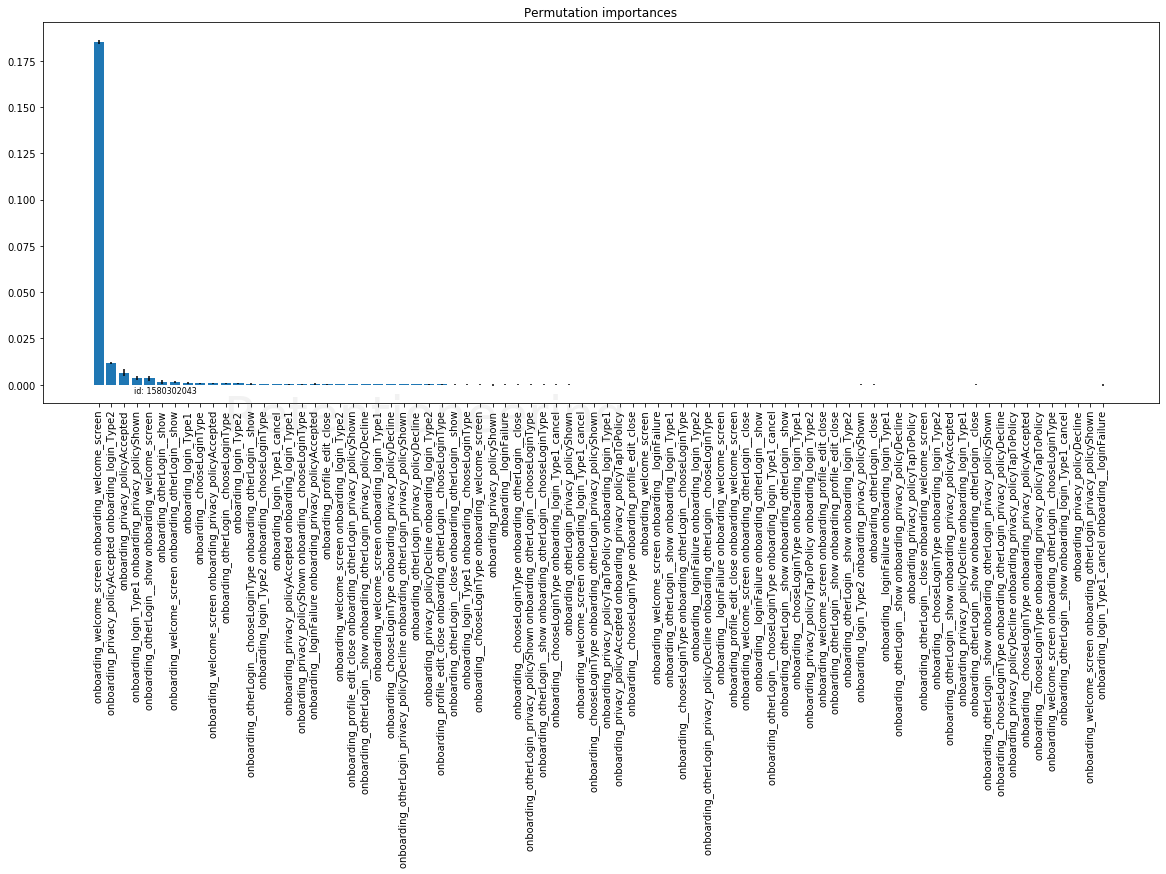

,importances_mean,importances_std,feature
4,0.185097,0.001271,"(onboarding_welcome_screen, onboarding_welcome..."
27,0.011748,0.000697,"(onboarding_privacy_policyAccepted, onboarding..."
13,0.006602,0.002056,"(onboarding_privacy_policyAccepted,)"
19,0.003738,0.000954,"(onboarding_login_Type1, onboarding_privacy_po..."
2,0.003495,0.001344,"(onboarding_otherLogin__show, onboarding_welco..."
...,...,...,...
46,-0.000049,0.000097,"(onboarding_welcome_screen, onboarding_otherLo..."
38,-0.000049,0.000097,"(onboarding_otherLogin__show, onboarding_login..."
30,-0.000049,0.000182,"(onboarding_privacy_policyDecline,)"
9,-0.000049,0.000097,"(onboarding_welcome_screen, onboarding_otherLo..."


In [28]:
model.permutation_importance(features, target, thresh=0.)